# Boston Housing Price Pred

In [23]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [25]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()



print(len(train_data))
print(len(test_data))


65536/57026 [==================================] - 0s 0us/step
404
102


In [27]:
# standardization
# apply the train mean/std to test as well, to prevent data leakage
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_stand = ( train_data - mean ) / std
test_stand = (test_data - mean) / std


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_4 (Batch (None, 13)                52        
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)               

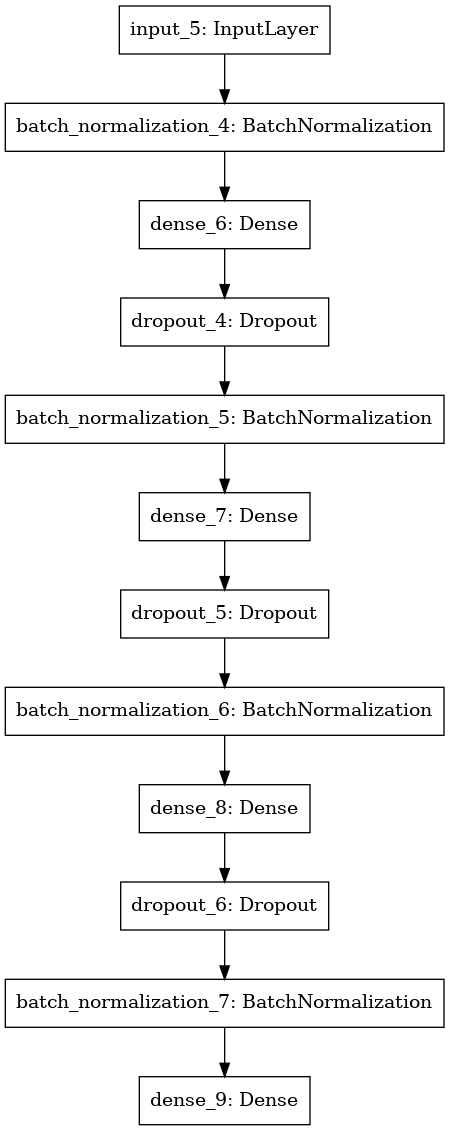

In [28]:
# model creation and compile

import tensorflow as tf
from tensorflow.keras import models, layers, utils

model = models.Sequential([layers.Input(shape=(train_data.shape[1],)),
                          layers.BatchNormalization(),
                           layers.Dense(128, activation='relu'),
                            layers.Dropout(0.5),
                           layers.BatchNormalization(),
                          layers.Dense(64, activation='relu'),
                           layers.Dropout(0.5),
                           layers.BatchNormalization(),
                           layers.Dense(64, activation='relu'),
                           layers.Dropout(0.5),
                           layers.BatchNormalization(),
                          layers.Dense(1, activation='linear')]) # should be linear, not softmax etc.

model.summary()

model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

utils.plot_model(model)



In [29]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

# model training

history = model.fit(train_stand, train_labels,
                   epochs=20,
                   batch_size=64,
                   validation_data=(test_stand, test_labels)
                   )

Epoch 1/20
7/7 [==============================] - 1s 31ms/step - loss: 583.3281 - mae: 22.3677 - val_loss: 611.8876 - val_mae: 23.0727
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 571.2367 - mae: 22.2960 - val_loss: 606.1840 - val_mae: 23.0098
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 567.0164 - mae: 22.2226 - val_loss: 599.9247 - val_mae: 22.9392
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 559.0369 - mae: 22.1461 - val_loss: 593.8847 - val_mae: 22.8803
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 551.5770 - mae: 22.0650 - val_loss: 588.6503 - val_mae: 22.8447
Epoch 6/20
7/7 [==============================] - 0s 7ms/step - loss: 542.7724 - mae: 21.9778 - val_loss: 583.7621 - val_mae: 22.8213
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 535.7408 - mae: 21.8829 - val_loss: 578.5503 - val_mae: 22.7992
Epoch 8/20
7/7 [==============================] - 0s 7ms/step

In [32]:
train_data.shape

(404, 13)

In [34]:
train_stand[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

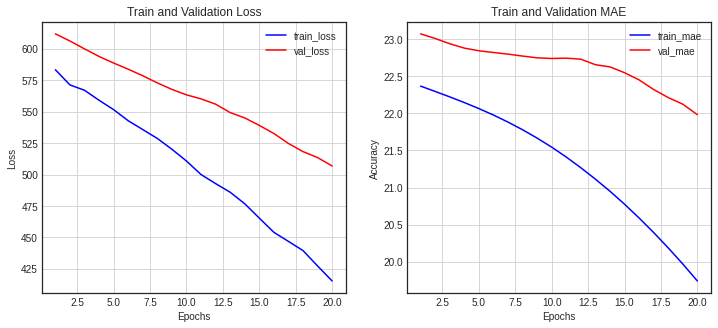

In [30]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [31]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_stand, test_labels)


4/4 [==============================] - 0s 2ms/step - loss: 506.8021 - mae: 21.9829


[506.8021240234375, 21.98291778564453]

# Reuters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                 test_size=0.25,
                                                 random_state=2024)



# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(set(y_test)))



6736
2246
2246
46


In [3]:
x_train[0]

[1,
 4263,
 387,
 111,
 8,
 16,
 625,
 42,
 120,
 31,
 2,
 387,
 705,
 13,
 2,
 6,
 1956,
 249,
 324,
 27,
 4263,
 1478,
 136,
 4,
 120,
 4,
 2572,
 926,
 707,
 5,
 2,
 71,
 33,
 1956,
 84,
 6,
 147,
 11,
 1396,
 983,
 5,
 249,
 10,
 289,
 457,
 1555,
 156,
 89,
 9,
 527,
 6,
 781,
 84,
 6,
 132,
 11,
 1396,
 983,
 10,
 289,
 7,
 448,
 9,
 388,
 11,
 983,
 10,
 289,
 13,
 4,
 1353,
 5,
 4,
 613,
 702,
 316,
 7684,
 2474,
 21,
 4,
 3260,
 5,
 571,
 1106,
 10,
 4263,
 176,
 8,
 4,
 605,
 23,
 511,
 94,
 68,
 89,
 2532,
 429,
 68,
 4560,
 9,
 23,
 2,
 3599,
 6256,
 36,
 8,
 4,
 613,
 1343,
 13,
 4634,
 5,
 249,
 324,
 27,
 8180,
 643,
 249,
 111,
 2,
 71,
 8180,
 249,
 4501,
 111,
 9,
 4263,
 387,
 122,
 111,
 4263,
 387,
 8,
 17,
 12]

In [4]:
y_train[0]

17

In [5]:
# pre-processing text data

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(x_test)

y_train_cat = utils.to_categorical(y_train)
y_val_cat = utils.to_categorical(y_val)
y_test_cat = utils.to_categorical(y_test)


In [6]:
# model creation

model = models.Sequential([
    layers.Input(shape=(x_train.shape[1], )),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(46, activation='softmax')
])



In [10]:
# callback

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
checkpoint_cb = callbacks.ModelCheckpoint('best_model.h5',
                                         save_best_only=True,
                                         monitor='val_loss',
                                         mode='min')
              
early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                           monitor='val_loss',
                                           mode='min',
                                           restore_best_weights=True)
              
              
              

In [11]:
# train

history = model.fit(x_train, y_train_cat,
                   epochs=100,
                   validation_split=0.2,
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
169/169 [==============================] - 2s 7ms/step - loss: 2.2132 - accuracy: 0.4955 - val_loss: 1.6921 - val_accuracy: 0.6691
Epoch 2/100
169/169 [==============================] - 1s 5ms/step - loss: 1.4157 - accuracy: 0.6604 - val_loss: 1.2310 - val_accuracy: 0.7159
Epoch 3/100
169/169 [==============================] - 1s 5ms/step - loss: 1.1890 - accuracy: 0.7051 - val_loss: 1.1843 - val_accuracy: 0.7567
Epoch 4/100
169/169 [==============================] - 1s 5ms/step - loss: 1.0270 - accuracy: 0.7452 - val_loss: 1.2591 - val_accuracy: 0.7611
Epoch 5/100
169/169 [==============================] - 1s 5ms/step - loss: 0.8812 - accuracy: 0.7829 - val_loss: 1.3557 - val_accuracy: 0.7619
Epoch 6/100
169/169 [==============================] - 1s 4ms/step - loss: 0.7976 - accuracy: 0.7971 - val_loss: 1.4531 - val_accuracy: 0.7648
Epoch 7/100
169/169 [==============================] - 1s 5ms/step - loss: 0.7192 - accuracy: 0.8116 - val_loss: 1.5356 - val_accuracy: 0.7789

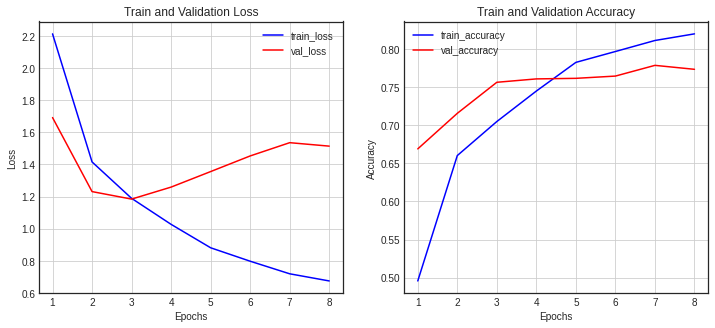

In [12]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [14]:
loss, accuracy = model.evaluate(x_test, y_test_cat)

loss, accuracy

71/71 [==============================] - 0s 3ms/step - loss: 1.2141 - accuracy: 0.7422


(1.2140822410583496, 0.7422083616256714)

# CIFAR10

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, utils
from tensorflow.keras.datasets import cifar10

In [4]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=2024)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170508288/170498071 [==============================] - 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

[0]


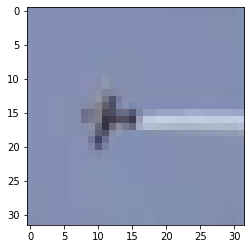

In [6]:
# visualize the 0th data

plt.figure()
plt.imshow(x_train[0])
print(y_train[0])

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
# reshape for flattened input

x_train = x_train.reshape(-1, 3072)
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [9]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

from tensorflow.keras.utils import to_categorical

In [10]:
# one hot vectorize Y

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


x_train.shape
y_train.shape

(40000, 10)

In [15]:
# create model

model = models.Sequential([
    layers.Input(shape=(3072, )),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

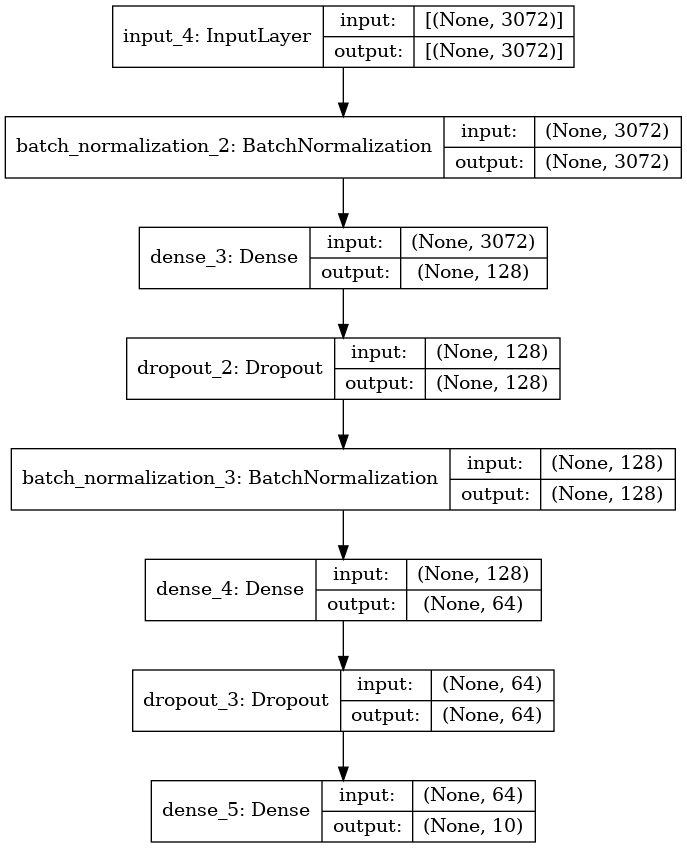

In [16]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

In [17]:
# add callbacks

from tensorflow.keras import callbacks

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

checkpoint_cb = callbacks.ModelCheckpoint('best_model.h5',
                                         save_best_only=True,
                                         monitor='val_loss')


early_stopping_cb = callbacks.EarlyStopping(patience=5,
                                           monitor='val_loss',
                                           restore_best_weights=True)

In [18]:
# train model

history2 = model.fit(x_train, y_train,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 6s 3ms/step - loss: 2.0984 - accuracy: 0.2524 - val_loss: 1.7648 - val_accuracy: 0.3774
Epoch 2/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8811 - accuracy: 0.3191 - val_loss: 1.6917 - val_accuracy: 0.4081
Epoch 3/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8235 - accuracy: 0.3441 - val_loss: 1.6536 - val_accuracy: 0.4123
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7934 - accuracy: 0.3544 - val_loss: 1.6181 - val_accuracy: 0.4215
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7754 - accuracy: 0.3576 - val_loss: 1.6109 - val_accuracy: 0.4334
Epoch 6/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7556 - accuracy: 0.3692 - val_loss: 1.5967 - val_accuracy: 0.4423
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7379 - accuracy: 0.3719 - val_loss: 1.5735 - val_ac

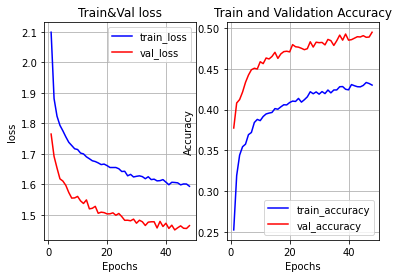

In [20]:
# model evaluation

history_dict2 = history2.history

loss = history_dict2['loss']
val_loss = history_dict2['val_loss']

epochs = range(1, len(loss) +1)
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train&Val loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

accuracy = history_dict2['accuracy']
val_accuracy = history_dict2['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show();

In [22]:
# evaluate

model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 1.4308 - accuracy: 0.4986


[1.4308032989501953, 0.4986000061035156]